In [ ]:
pip install seaborn

In [117]:
import pandas as pd

# Load the data-file
df = pd.read_stata('marijuana5.dta')

# Display the first few rows of the dataset
df.head()


,HH_id,marpart,marfreq,year,capital,age,agegroup,male,married,unempl,educstatus,log_hhldincome,decrim,log_prmar,log_pralc,log_prtob
0,1.0,0.0,0.0,2001.0,0.0,39.0,4.0,1.0,1.0,0.0,1.0,10.277993,0.0,4.266546,5.508173,3.936228
1,2.0,0.0,0.0,2001.0,1.0,73.0,7.0,0.0,1.0,0.0,1.0,9.988999,0.0,4.306764,5.639421,3.936228
2,3.0,0.0,0.0,2001.0,1.0,53.0,5.0,0.0,1.0,0.0,3.0,9.507222,0.0,4.292512,5.606170,3.947873
3,4.0,0.0,0.0,2001.0,1.0,50.0,5.0,0.0,0.0,0.0,4.0,10.780188,0.0,4.292512,5.606170,3.947873
4,5.0,1.0,3.0,2001.0,0.0,26.0,3.0,0.0,0.0,0.0,1.0,9.184523,0.0,4.266546,5.508173,3.936228


Background analyses

Descriptive Statistics

In [118]:
# Check the missing value and datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HH_id           30000 non-null  float32
 1   marpart         30000 non-null  float64
 2   marfreq         30000 non-null  float64
 3   year            30000 non-null  float32
 4   capital         30000 non-null  float32
 5   age             30000 non-null  float64
 6   agegroup        30000 non-null  float32
 7   male            30000 non-null  float32
 8   married         30000 non-null  float32
 9   unempl          30000 non-null  float32
 10  educstatus      30000 non-null  float32
 11  log_hhldincome  30000 non-null  float32
 12  decrim          30000 non-null  float32
 13  log_prmar       30000 non-null  float32
 14  log_pralc       30000 non-null  float32
 15  log_prtob       30000 non-null  float32
dtypes: float32(13), float64(3)
memory usage: 2.2 MB


In [119]:
# Get summary statistics for each variable
summary_stats = df.describe().T.style.background_gradient(cmap = 'YlGn')
display(summary_stats)


,count,mean,std,min,25%,50%,75%,max
HH_id,30000.000000,2531.642578,1495.722778,1.000000,1250.750000,2500.500000,3750.250000,5721.000000
marpart,30000.000000,0.107267,0.309457,0.000000,0.000000,0.000000,0.000000,1.000000
marfreq,30000.000000,0.221100,0.694380,0.000000,0.000000,0.000000,0.000000,3.000000
year,30000.000000,2008.447876,5.272552,2001.000000,2004.000000,2007.000000,2013.000000,2016.000000
capital,30000.000000,0.647033,0.477900,0.000000,0.000000,1.000000,1.000000,1.000000
age,30000.000000,46.541367,16.869919,14.000000,33.000000,45.000000,60.000000,98.000000
agegroup,30000.000000,4.538300,1.652097,1.000000,3.000000,4.000000,6.000000,7.000000
male,30000.000000,0.460967,0.498482,0.000000,0.000000,0.000000,1.000000,1.000000
married,30000.000000,0.630100,0.482785,0.000000,0.000000,1.000000,1.000000,1.000000
unempl,30000.000000,0.031867,0.175648,0.000000,0.000000,0.000000,0.000000,1.000000


Data Visualization

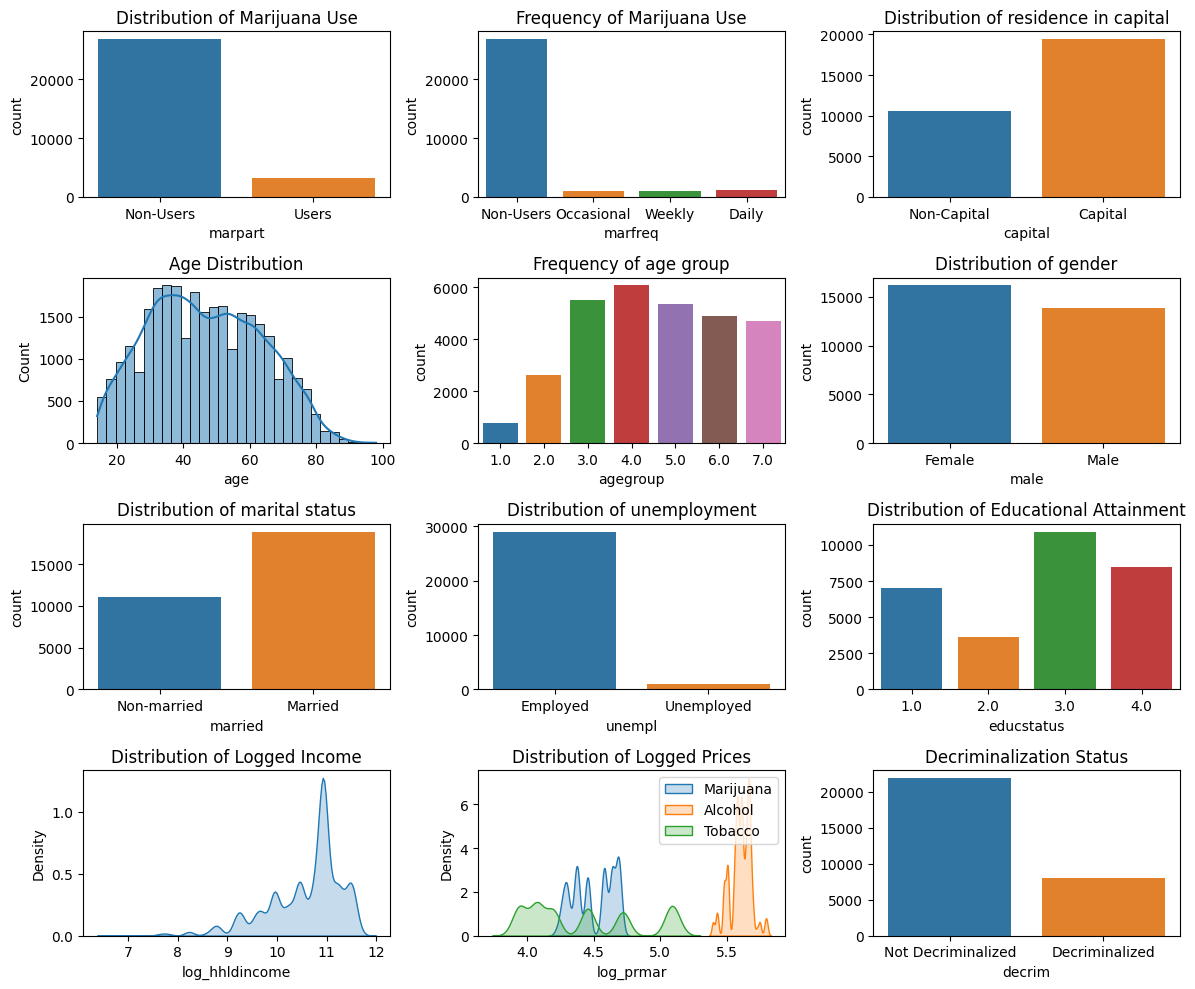

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

# Plot distribution of marijuana use
sns.countplot(x='marpart', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Marijuana Use')
axes[0, 0].set_xticklabels(['Non-Users', 'Users'])

# Plot distribution of frequency of marijuana use
sns.countplot(x='marfreq', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Frequency of Marijuana Use')
axes[0, 1].set_xticklabels(['Non-Users', 'Occasional', 'Weekly', 'Daily'])

# Plot distribution of capital
sns.countplot(x='capital', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of residence in capital')
axes[0, 2].set_xticklabels(['Non-Capital', 'Capital'])

# Plot distribution of age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution')

# Plot distribution of age group
sns.countplot(x='agegroup', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Frequency of age group')

# Plot distribution of gender
sns.countplot(x='male', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of gender')
axes[1, 2].set_xticklabels(['Female', 'Male'])

# Plot distribution of marital status
sns.countplot(x='married', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of marital status')
axes[2, 0].set_xticklabels(['Non-married', 'Married'])

# Plot distribution of unemployment
sns.countplot(x='unempl', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of unemployment')
axes[2, 1].set_xticklabels(['Employed', 'Unemployed'])

# Plot distribution of educational status
sns.countplot(x='educstatus', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Distribution of Educational Attainment')

# Plot distribution of log income
sns.kdeplot(df['log_hhldincome'], fill=True, label='Income', ax=axes[3, 0])
axes[3, 0].set_title('Distribution of Logged Income')

# Plot distribution of log prices of marijuana, alcohol, and tobacco
sns.kdeplot(df['log_prmar'], fill=True, label='Marijuana', ax=axes[3, 1])
sns.kdeplot(df['log_pralc'], fill=True, label='Alcohol', ax=axes[3, 1])
sns.kdeplot(df['log_prtob'], fill=True, label='Tobacco', ax=axes[3, 1])
axes[3, 1].set_title('Distribution of Logged Prices')
axes[3, 1].legend()

# Plot distribution of decriminalization status
sns.countplot(x='decrim', data=df, ax=axes[3, 2])
axes[3, 2].set_title('Decriminalization Status')
axes[3, 2].set_xticklabels(['Not Decriminalized', 'Decriminalized'])

# Adjust layout
plt.tight_layout()
plt.show()


Check the relationship between marijuana participation and the variables of interest (unemployment status, age, and level of education)

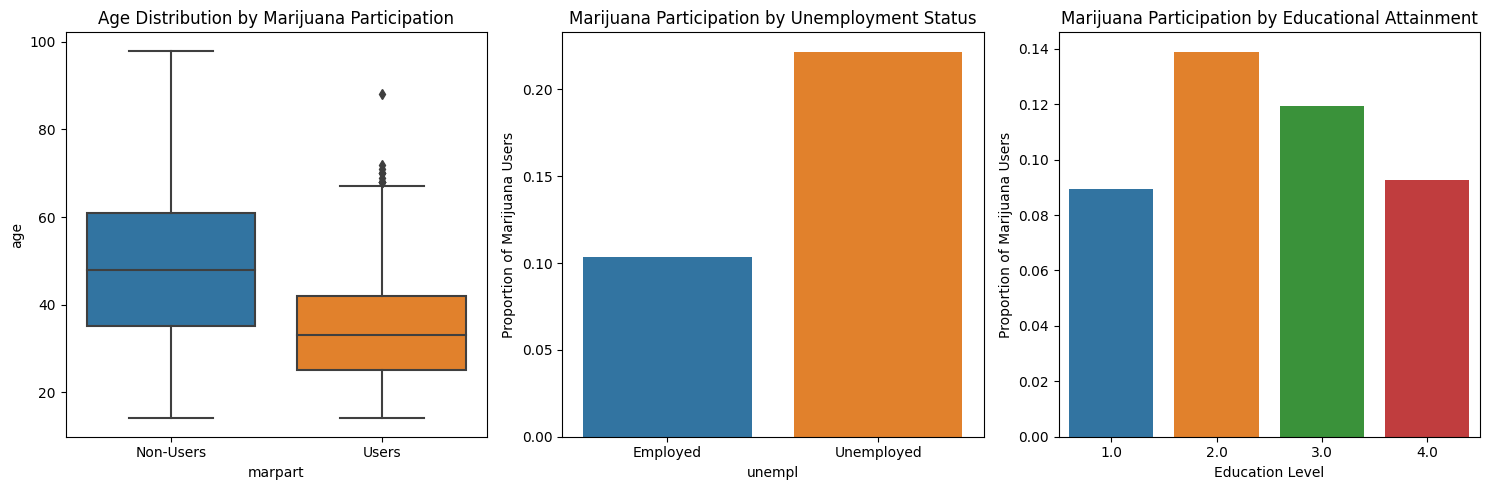

In [128]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for Age vs Marijuana Participation
sns.boxplot(x='marpart', y='age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution by Marijuana Participation')
axes[0].set_xticklabels(['Non-Users', 'Users'])

# Bar plot for Marijuana Participation vs Unemployment Status
sns.barplot(x='unempl', y='marpart', data=df, ax=axes[1], errorbar=None)
axes[1].set_title('Marijuana Participation by Unemployment Status')
axes[1].set_xticklabels(['Employed', 'Unemployed'])
axes[1].set_ylabel('Proportion of Marijuana Users')

# Bar plot for Marijuana Participation vs Educational Attainment
sns.barplot(x='educstatus', y='marpart', data=df, ax=axes[2], errorbar=None)
axes[2].set_title('Marijuana Participation by Educational Attainment')
axes[2].set_xlabel('Education Level')
axes[2].set_ylabel('Proportion of Marijuana Users')

# Adjust layout
plt.tight_layout()
plt.show()


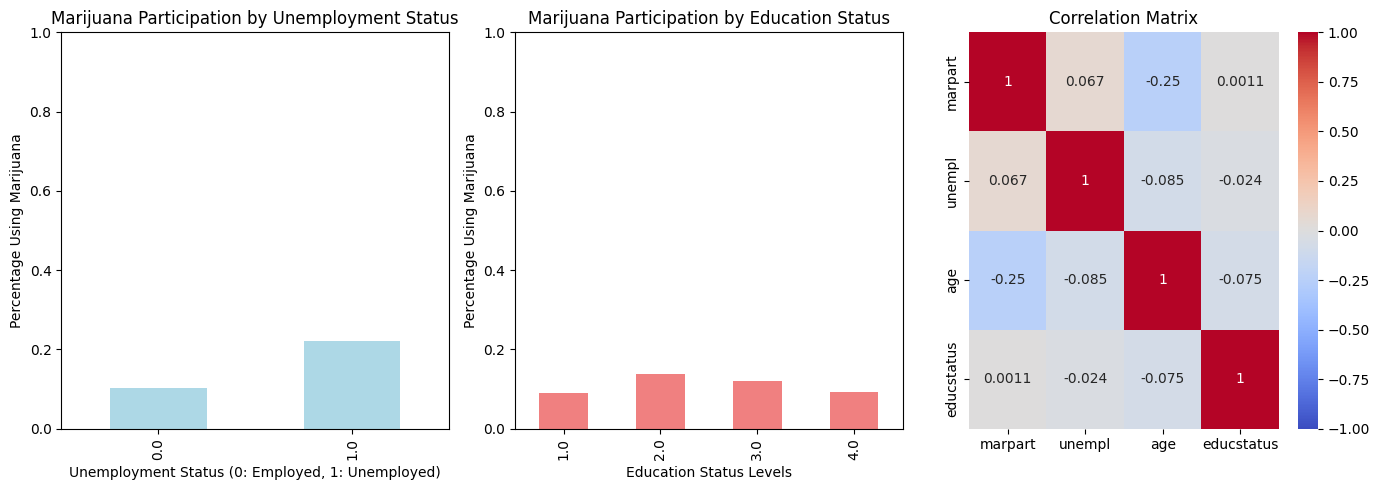

In [84]:
# Recalculating cross-tabulations and correlations
crosstab_unempl = pd.crosstab(df['unempl'], df['marpart'], normalize='index')
crosstab_educstatus = pd.crosstab(df['educstatus'], df['marpart'], normalize='index')

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

# Bar plot for cross-tabulation with unemployment status
crosstab_unempl[1].plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_title('Marijuana Participation by Unemployment Status')
axes[0].set_xlabel('Unemployment Status (0: Employed, 1: Unemployed)')
axes[0].set_ylabel('Percentage Using Marijuana')
axes[0].set_ylim(0, 1)

# Bar plot for cross-tabulation with education status
crosstab_educstatus[1].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Marijuana Participation by Education Status')
axes[1].set_xlabel('Education Status Levels')
axes[1].set_ylabel('Percentage Using Marijuana')
axes[1].set_ylim(0, 1)

# Heatmap for correlation coefficients
corr_matrix = df[['marpart', 'unempl', 'age', 'educstatus']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[2], vmin=-1, vmax=1)
axes[2].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


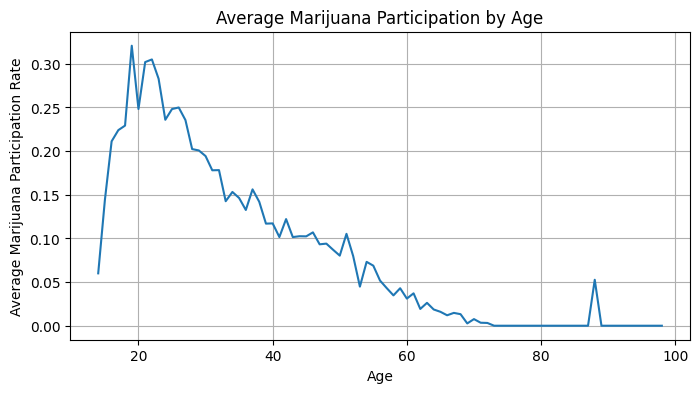

In [85]:
# Calculate the average rate of marijuana participation for each age
age_participation_avg = df.groupby('age')['marpart'].mean()

# Plotting the relationship
plt.figure(figsize=(8, 4))
age_participation_avg.plot()
plt.title('Average Marijuana Participation by Age')
plt.xlabel('Age')
plt.ylabel('Average Marijuana Participation Rate')
plt.grid(True)
plt.show()


Econometric analyses

Check the relationship between marijuana participation and the remaining variables

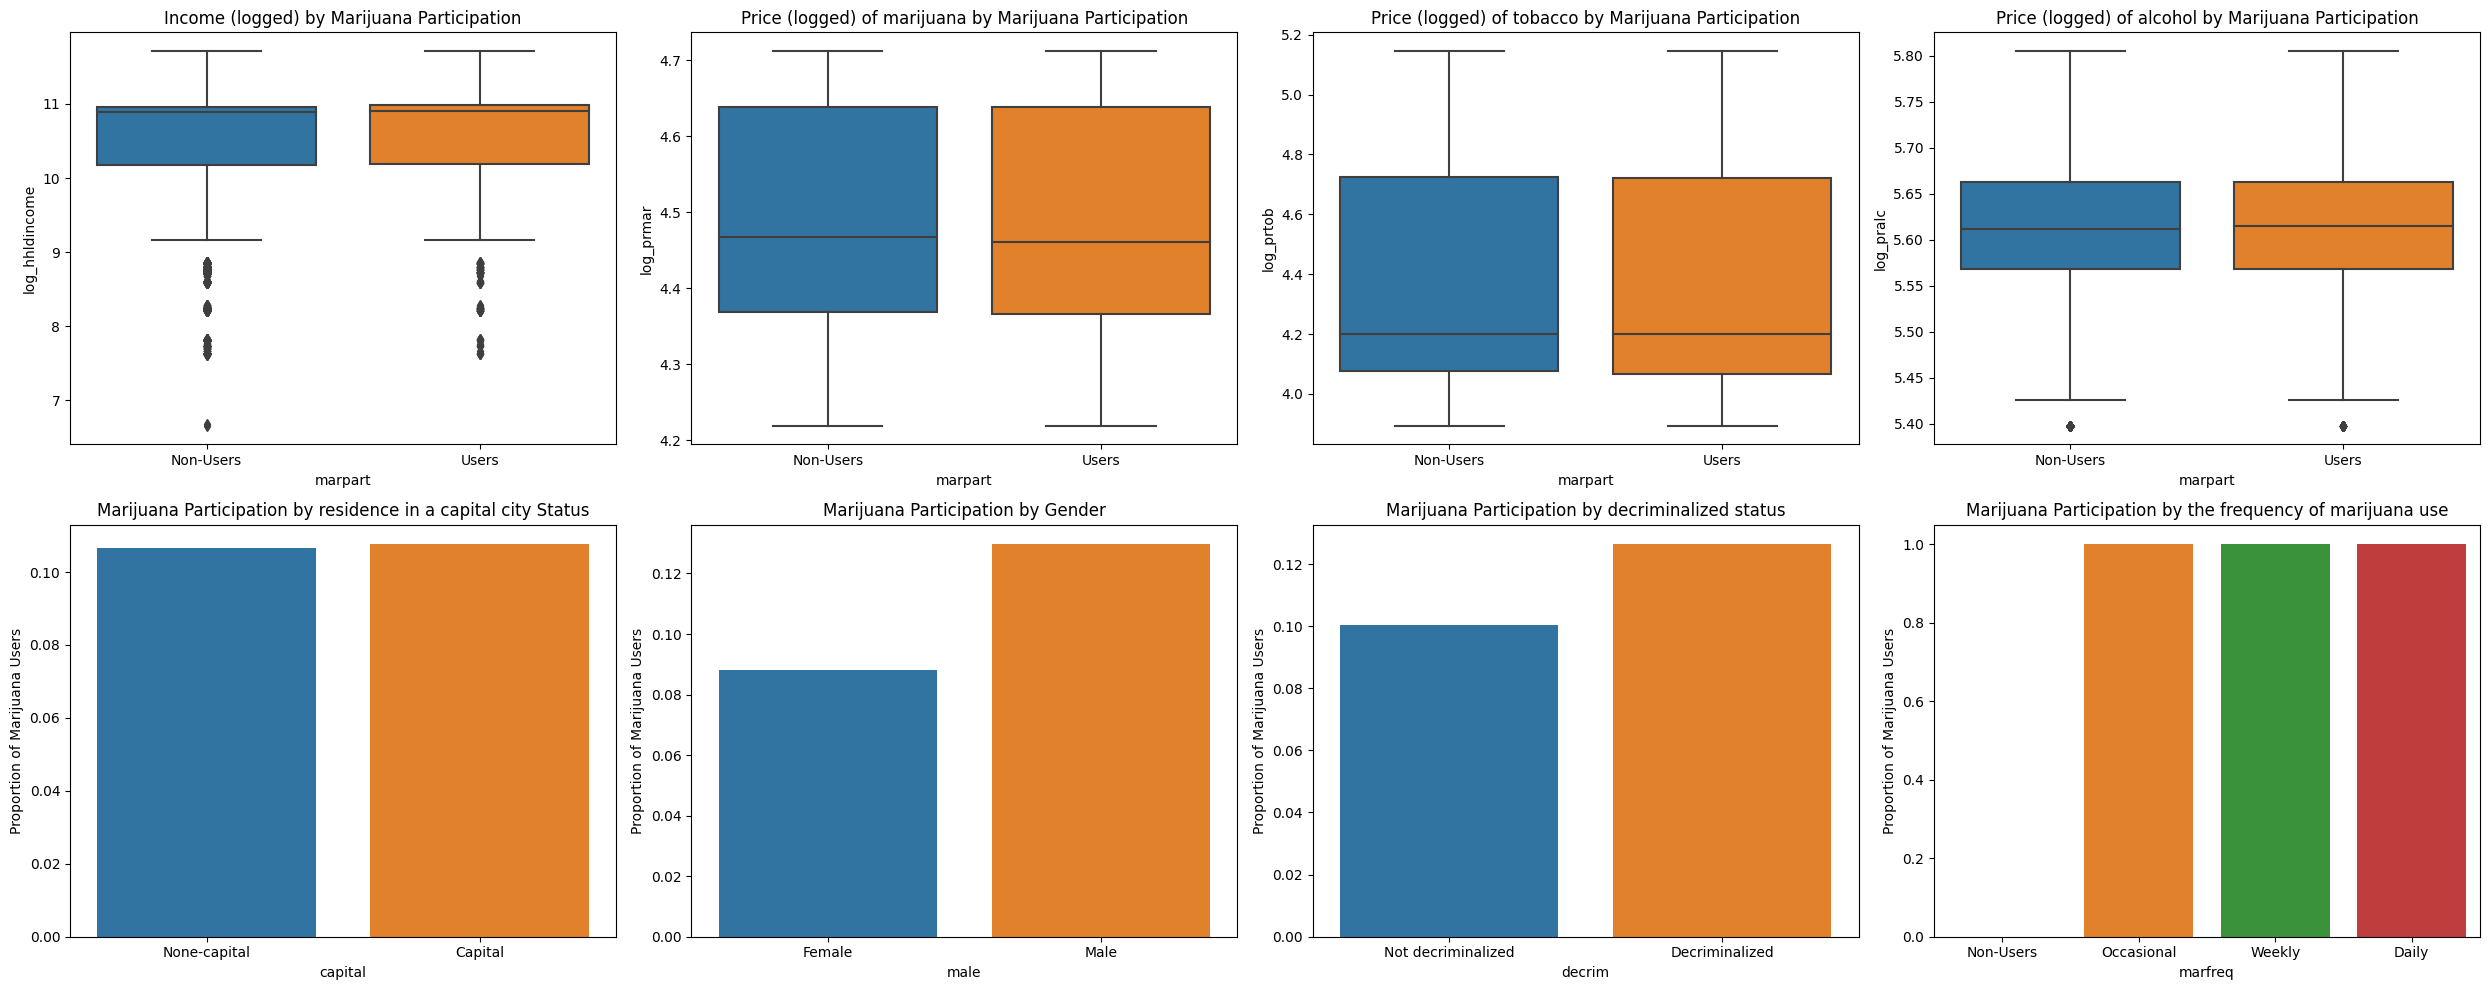

In [155]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

# Box plot for household income (logged) vs Marijuana Participation
sns.boxplot(x='marpart', y='log_hhldincome', data=df, ax=axes[0,0])
axes[0,0].set_title('Income (logged) by Marijuana Participation')
axes[0,0].set_xticklabels(['Non-Users', 'Users'])

# Box plot for price (logged) of marijuana, tobacco, and alcohol vs Marijuana Participation
sns.boxplot(x='marpart', y='log_prmar', data=df, ax=axes[0,1])
axes[0,1].set_title('Price (logged) of marijuana by Marijuana Participation')
axes[0,1].set_xticklabels(['Non-Users', 'Users'])

# Box plot for price (logged) of tobacco, and alcohol vs Marijuana Participation
sns.boxplot(x='marpart', y='log_prtob', data=df, ax=axes[0,2])
axes[0,2].set_title('Price (logged) of tobacco by Marijuana Participation')
axes[0,2].set_xticklabels(['Non-Users', 'Users'])

# Box plot for price (logged) of alcohol vs Marijuana Participation
sns.boxplot(x='marpart', y='log_pralc', data=df, ax=axes[0,3])
axes[0,3].set_title('Price (logged) of alcohol by Marijuana Participation')
axes[0,3].set_xticklabels(['Non-Users', 'Users'])

# Bar plot for Marijuana Participation vs residence in a capital city Status
sns.barplot(x='capital', y='marpart', data=df, ax=axes[1,0], errorbar=None)
axes[1,0].set_title('Marijuana Participation by residence in a capital city Status')
axes[1,0].set_xticklabels(['None-capital', 'Capital'])
axes[1,0].set_ylabel('Proportion of Marijuana Users')

# Bar plot for Marijuana Participation vs Gender
sns.barplot(x='male', y='marpart', data=df, ax=axes[1,1], errorbar=None)
axes[1,1].set_title('Marijuana Participation by Gender')
axes[1,1].set_xticklabels(['Female', 'Male'])
axes[1,1].set_ylabel('Proportion of Marijuana Users')

# Bar plot for Marijuana Participation vs decriminalized status
sns.barplot(x='decrim', y='marpart', data=df, ax=axes[1,2], errorbar=None)
axes[1,2].set_title('Marijuana Participation by decriminalized status')
axes[1,2].set_xticklabels(['Not decriminalized', 'Decriminalized'])
axes[1,2].set_ylabel('Proportion of Marijuana Users')

# Bar plot for Marijuana Participation vs the frequency of marijuana use
sns.barplot(x='marfreq', y='marpart', data=df, ax=axes[1,3], errorbar=None)
axes[1,3].set_title('Marijuana Participation by the frequency of marijuana use')
axes[1,3].set_xticklabels(['Non-Users', 'Occasional', 'Weekly', 'Daily'])
axes[1,3].set_ylabel('Proportion of Marijuana Users')

# Adjust layout
plt.tight_layout()
plt.show()

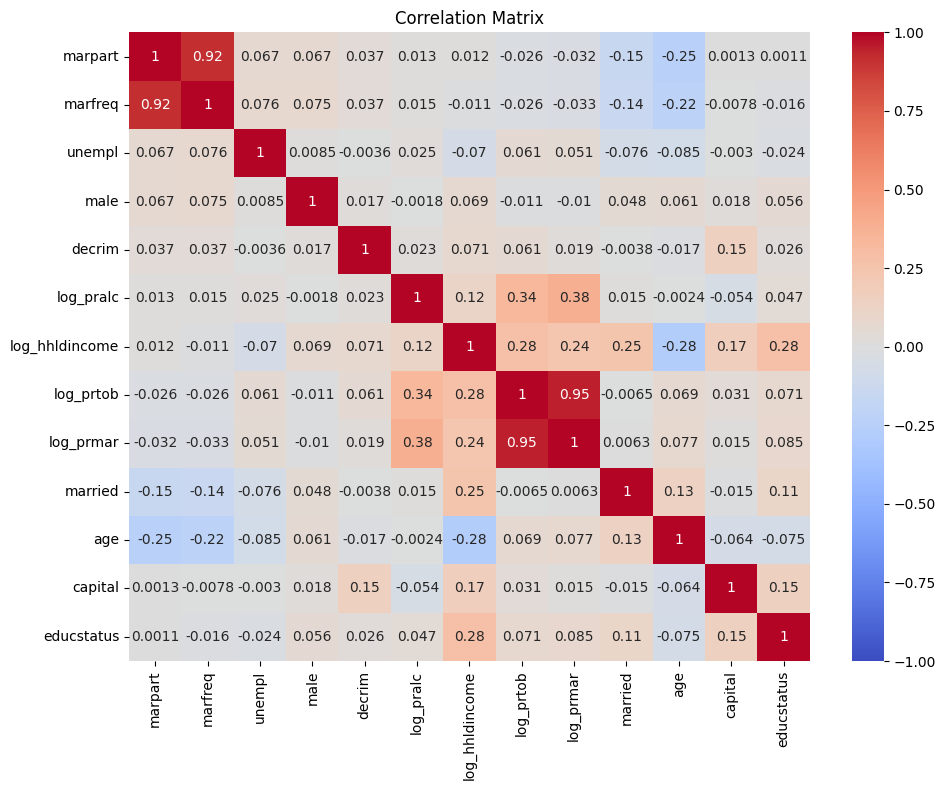

In [157]:
# Plotting Heatmap for correlation coefficients of all variables
fig, axes = plt.subplots(figsize=(10, 8))

corr_matrix = df[['marpart', 'marfreq', 'unempl', 'male', 'decrim', 'log_pralc', 'log_hhldincome', 'log_prtob', 'log_prmar', 'married', 'age', 'capital', 'educstatus']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
axes.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

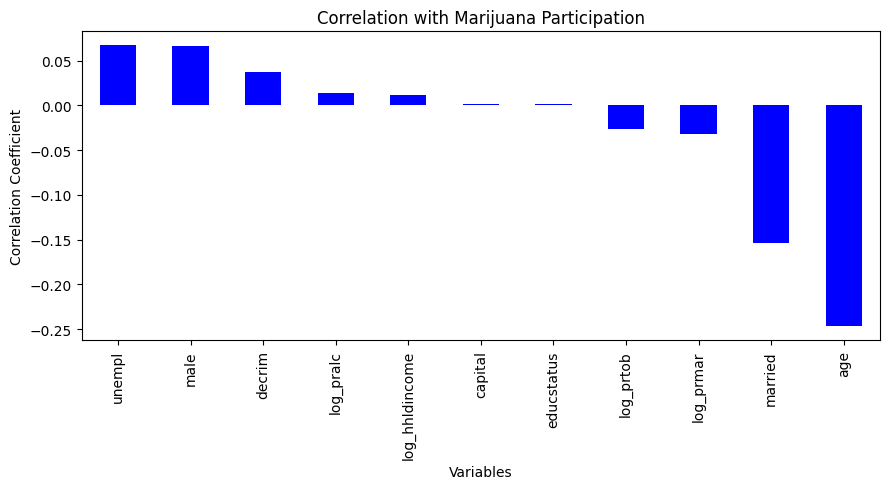

In [175]:
# Check correlations between potential explanatory variables (except "HH_id", "marfreq", "year", "agegroup" and 'marpart')
correlations = df.drop(columns=["HH_id", "marfreq", "year", "agegroup"]).corr()['marpart']

# Displaying the correlations
correlations_sorted = correlations.sort_values(ascending=False)
correlations_sorted

# Plotting the correlations
plt.figure(figsize=(9,5))
correlations_sorted.drop('marpart').plot(kind='bar', color='blue')
plt.title('Correlation with Marijuana Participation')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()

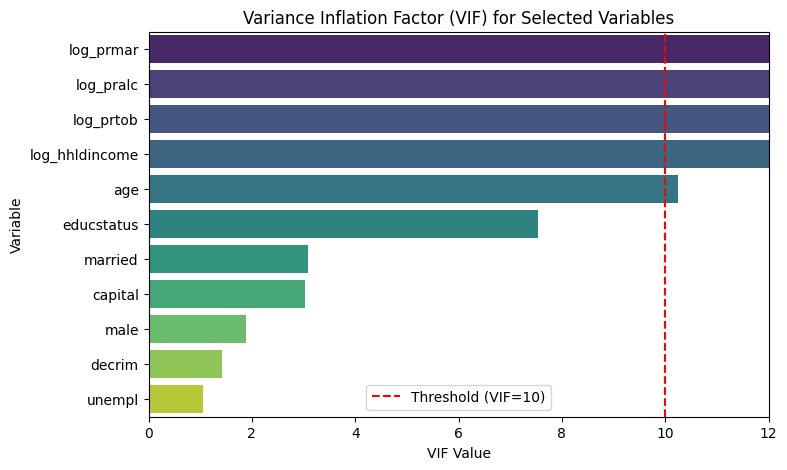

In [191]:
# Assess multicollinearity among independent variables using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting potential explanatory variables (excluding 'capital' and 'edustatus')
explanatory_vars = ['unempl', 'male', 'decrim', 'log_pralc', 'log_hhldincome', 'log_prtob', 'log_prmar', 'married', 'age', 'capital', 'educstatus']

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = explanatory_vars
vif_data["VIF"] = [variance_inflation_factor(df[explanatory_vars].values, i) for i in range(df[explanatory_vars].shape[1])]

sorted_vif_data = vif_data.sort_values(by="VIF", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='VIF', y='Variable', data=sorted_vif_data, palette='viridis')
plt.title('Variance Inflation Factor (VIF) for Selected Variables')
plt.xlabel('VIF Value')
plt.ylabel('Variable')
plt.xlim(0, 12)  # Adjusting x-axis limit
plt.axvline(x=10, color='red', linestyle='--', label='Threshold (VIF=10)')  # Drawing a line for VIF=10 threshold
plt.legend()
plt.show()

In [192]:
# Generate year dummies
year_dummies = pd.get_dummies(df['year'], drop_first=True, prefix='year')

# Adding the year dummies to the dataset
df = pd.concat([df, year_dummies], axis=1)

In [203]:
# Generate squared age term
df['age_squared'] = df['age']**2

# Define independent variables (excluding one year dummy to avoid perfect multicollinearity)
X = df[['unempl', 'male', 'decrim', 'married', 'age_squared'] + [col for col in year_dummies.columns]]
X = sm.add_constant(X)  # Add a constant to the model

# Define dependent variable
y = df['marpart']

# Convert the selected independent variables to float64
X = X.astype('float64')

# Estimate Probit model
try:
    probit_model = sm.Probit(y, X).fit()
    probit_summary = probit_model.summary()
except Exception as e:
    probit_summary = str(e)

# Estimate Logit model
try:
    logit_model = sm.Logit(y, X).fit()
    logit_summary = logit_model.summary()
except Exception as e:
    logit_summary = str(e)

probit_summary, logit_summary


Optimization terminated successfully.
         Current function value: 0.293223
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.294263
         Iterations 7


(<class 'statsmodels.iolib.summary.Summary'>
 """
                           Probit Regression Results                           
 Dep. Variable:                marpart   No. Observations:                30000
 Model:                         Probit   Df Residuals:                    29989
 Method:                           MLE   Df Model:                           10
 Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.1395
 Time:                        10:24:01   Log-Likelihood:                -8796.7
 converged:                       True   LL-Null:                       -10223.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
 -------------------------------------------------------------------------------
 const          -0.5041      0.031    -16.343      0.000      -0.565      -0.444
 unempl          0.2716      0.049      5.558      0.000       0.17

In [205]:
# Calculate correlations between 'marpart' and 'log_pralc' and between 'marpart' and 'log_prtob'
correlation_alcohol = df['marpart'].corr(df['log_pralc'])
correlation_tobacco = df['marpart'].corr(df['log_prtob'])

correlation_alcohol, correlation_tobacco


(0.01345746296555321, -0.025824172708109043)

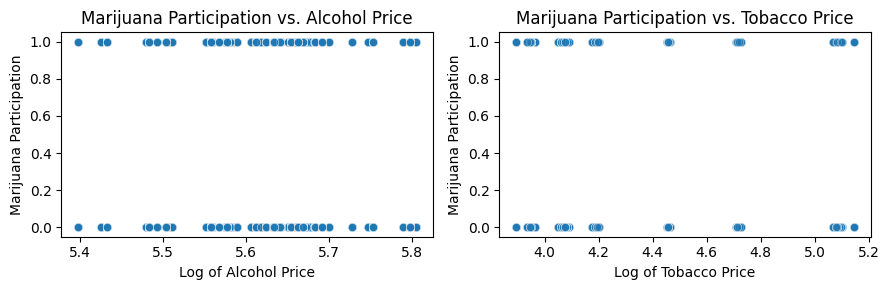

In [211]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

# Marijuana Participation vs. Alcohol Price
sns.scatterplot(data=df, x='log_pralc', y='marpart', ax=axes[0], alpha=0.5)
axes[0].set_title('Marijuana Participation vs. Alcohol Price')
axes[0].set_xlabel('Log of Alcohol Price')
axes[0].set_ylabel('Marijuana Participation')

# Marijuana Participation vs. Tobacco Price
sns.scatterplot(data=df, x='log_prtob', y='marpart', ax=axes[1], alpha=0.5)
axes[1].set_title('Marijuana Participation vs. Tobacco Price')
axes[1].set_xlabel('Log of Tobacco Price')
axes[1].set_ylabel('Marijuana Participation')

plt.tight_layout()
plt.show()


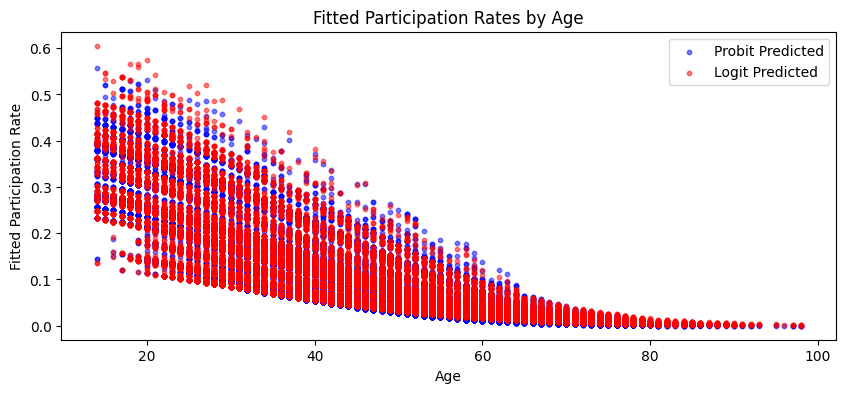

In [218]:
# Predicted values for Probit model
df['probit_predicted'] = probit_model.predict(X)

# Predicted values for Logit model
df['logit_predicted'] = logit_model.predict(X)

# Plotting the fitted values
plt.figure(figsize=(10, 4))
plt.scatter(df['age'], df['probit_predicted'], color='blue', label='Probit Predicted', alpha=0.5, s=10)
plt.scatter(df['age'], df['logit_predicted'], color='red', label='Logit Predicted', alpha=0.5, s=10)
plt.xlabel('Age')
plt.ylabel('Fitted Participation Rate')
plt.title('Fitted Participation Rates by Age')
plt.legend()
plt.show()


In [219]:
# Define independent variables (excluding one year dummy to avoid perfect multicollinearity)
X_agegroup = df[['unempl', 'male', 'decrim', 'married', 'agegroup'] + [col for col in year_dummies.columns]]
X_agegroup = sm.add_constant(X_agegroup)  # Add a constant to the model

# Convert the selected independent variables to float64
X_agegroup = X_agegroup.astype('float64')

# Estimate Probit model using 'agegroup'
try:
    probit_model_agegroup = sm.Probit(y, X_agegroup).fit()
    probit_summary_agegroup = probit_model_agegroup.summary()
except Exception as e:
    probit_summary_agegroup = str(e)

# Estimate Logit model using 'agegroup'
try:
    logit_model_agegroup = sm.Logit(y, X_agegroup).fit()
    logit_summary_agegroup = logit_model_agegroup.summary()
except Exception as e:
    logit_summary_agegroup = str(e)

probit_summary_agegroup, logit_summary_agegroup


Optimization terminated successfully.
         Current function value: 0.298648
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300305
         Iterations 7


(<class 'statsmodels.iolib.summary.Summary'>
 """
                           Probit Regression Results                           
 Dep. Variable:                marpart   No. Observations:                30000
 Model:                         Probit   Df Residuals:                    29989
 Method:                           MLE   Df Model:                           10
 Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.1236
 Time:                        15:16:33   Log-Likelihood:                -8959.4
 converged:                       True   LL-Null:                       -10223.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
 -------------------------------------------------------------------------------
 const          -0.1333      0.036     -3.708      0.000      -0.204      -0.063
 unempl          0.2996      0.049      6.146      0.000       0.20

In [220]:
# Define independent variables (excluding one year dummy to avoid perfect multicollinearity)
X_age = df[['unempl', 'male', 'decrim', 'married', 'agegroup', 'age'] + [col for col in year_dummies.columns]]
X_age = sm.add_constant(X_age)  # Add a constant to the model

# Convert the selected independent variables to float64
X_age = X_age.astype('float64')

# Estimate Probit model using 'agegroup'
try:
    probit_model_age = sm.Probit(y, X_age).fit()
    probit_summary_age = probit_model_age.summary()
except Exception as e:
    probit_summary_age = str(e)

# Estimate Logit model using 'agegroup'
try:
    logit_model_age = sm.Logit(y, X_age).fit()
    logit_summary_age = logit_model_age.summary()
except Exception as e:
    logit_summary_age = str(e)

probit_summary_age, logit_summary_age

Optimization terminated successfully.
         Current function value: 0.295703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.297074
         Iterations 7


(<class 'statsmodels.iolib.summary.Summary'>
 """
                           Probit Regression Results                           
 Dep. Variable:                marpart   No. Observations:                30000
 Model:                         Probit   Df Residuals:                    29988
 Method:                           MLE   Df Model:                           11
 Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.1322
 Time:                        15:23:18   Log-Likelihood:                -8871.1
 converged:                       True   LL-Null:                       -10223.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
 -------------------------------------------------------------------------------
 const          -0.0134      0.038     -0.356      0.722      -0.087       0.060
 unempl          0.2790      0.049      5.708      0.000       0.18

In [221]:
# Define independent variables without year_dummies
X_decrim = df[['unempl', 'male', 'decrim', 'married', 'agegroup']]
X_decrim = sm.add_constant(X_decrim)  # Add a constant to the model

# Estimate Probit model using 'agegroup'
try:
    probit_model_decrim = sm.Probit(y, X_decrim).fit()
    probit_summary_decrim = probit_model_decrim.summary()
except Exception as e:
    probit_summary_decrim = str(e)

# Estimate Logit model using 'agegroup'
try:
    logit_model_decrim = sm.Logit(y, X_decrim).fit()
    logit_summary_decrim = logit_model_decrim.summary()
except Exception as e:
    logit_summary_decrim = str(e)

probit_summary_decrim, logit_summary_decrim


Optimization terminated successfully.
         Current function value: 0.299063
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.300825
         Iterations 7


(<class 'statsmodels.iolib.summary.Summary'>
 """
                           Probit Regression Results                           
 Dep. Variable:                marpart   No. Observations:                30000
 Model:                         Probit   Df Residuals:                    29994
 Method:                           MLE   Df Model:                            5
 Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.1224
 Time:                        15:39:46   Log-Likelihood:                -8971.9
 converged:                       True   LL-Null:                       -10223.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const         -0.1861      0.030     -6.124      0.000      -0.246      -0.127
 unempl         0.2957      0.049      6.090      0.000       0.201   

In [224]:
# Group by 'educstatus' and compute the mean of 'marpart' to get the proportion of users in each group
education_proportions = df.groupby('educstatus')['marpart'].mean()

# Compute the standard deviation of the proportions to gauge variability
std_deviation = df.groupby('educstatus')['marpart'].std()

education_proportions, std_deviation



(educstatus
 1.0    0.089548
 2.0    0.138974
 3.0    0.119381
 4.0    0.092801
 Name: marpart, dtype: float64,
 educstatus
 1.0    0.285553
 2.0    0.345967
 3.0    0.324251
 4.0    0.290170
 Name: marpart, dtype: float64)

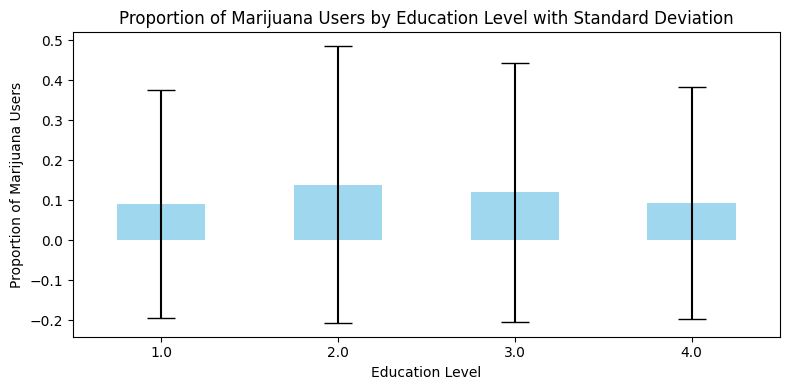

In [226]:
# Plotting the proportion of marijuana users by education level
# The bars represent the standard deviation for each education group.
plt.figure(figsize=(8,4))
education_proportions.plot(kind='bar', yerr=std_deviation, color='skyblue', alpha=0.8, capsize=10)

plt.title('Proportion of Marijuana Users by Education Level with Standard Deviation')
plt.ylabel('Proportion of Marijuana Users')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [229]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['educstatus'], df['marpart'])

# Conduct the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_val, dof, expected

(96.06490511495109,
 1.0900480059484856e-20,
 3,
 array([[6260.73886667,  752.26113333],
        [3218.30366667,  386.69633333],
        [9751.3262    , 1171.6738    ],
        [7551.63126667,  907.36873333]]))

In [222]:
# Getting predicted values (yhat) from the Probit model
df['yhat_probit'] = probit_model_decrim.predict(X_decrim)

# Generating squared values of yhat
df['yhat_probit_squared'] = df['yhat_probit']**2

# Conducting the link test for the Probit model
link_test_probit = sm.Probit(df['marpart'], df[['yhat_probit', 'yhat_probit_squared']]).fit()

# Getting the summary
link_test_probit_summary = link_test_probit.summary()

link_test_probit_summary


Optimization terminated successfully.
         Current function value: 0.477834
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                marpart   No. Observations:                30000
Model:                         Probit   Df Residuals:                    29998
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                 -0.4023
Time:                        16:16:47   Log-Likelihood:                -14335.
converged:                       True   LL-Null:                       -10223.
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
yhat_probit           -14.0818      0.143    -98.256      0.000     -14.363     -13.801
yhat_probit_squared    33.3765      0.438     76.244      0.000      32.519      34.235
=======================================================================================
"""

In [223]:
# Getting predicted values (yhat) from the Logit model
df['yhat_logit'] = logit_model_decrim.predict(X_decrim)

# Generating squared values of yhat
df['yhat_logit_squared'] = df['yhat_logit']**2

# Conducting the link test for the Logit model
link_test_logit = sm.Logit(df['marpart'], df[['yhat_logit', 'yhat_logit_squared']]).fit()

# Getting the summary
link_test_logit_summary = link_test_logit.summary()

link_test_logit_summary



Optimization terminated successfully.
         Current function value: 0.459853
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                marpart   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29998
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                 -0.3495
Time:                        16:16:53   Log-Likelihood:                -13796.
converged:                       True   LL-Null:                       -10223.
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
yhat_logit           -25.5804      0.284    -90.000      0.000     -26.137     -25.023
yhat_logit_squared    59.1285      0.846     69.907      0.000      57.471      60.786
======================================================================================
"""